In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla_data = yf.Ticker("TSLA")
tesla_data

yfinance.Ticker object <TSLA>

In [3]:
tesla_data = tesla_data.history(period="max") 

Failed to get ticker 'TSLA' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
TSLA: No timezone found, symbol may be delisted


In [4]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
tesla_data.reset_index(inplace=True)

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [7]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [27]:
tesla_revenue_data = requests.get(url).text

In [28]:
soup = BeautifulSoup(tesla_revenue_data, 'html5lib')

In [29]:
tesla_revenue_data = pd.DataFrame(columns=["Date", "Open", "Low", "Close", "Volume"])

In [30]:
tesla_revenue_data.tail()

,Date,Open,Low,Close,Volume


In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
tesla_stock_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)

Failed to get ticker 'TSLA' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['TSLA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [21]:
tesla_revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)

Failed to get ticker 'TSLA' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['TSLA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [22]:
tesla_stock_data.reset_index(inplace=True)
tesla_revenue_data.reset_index(inplace=True)

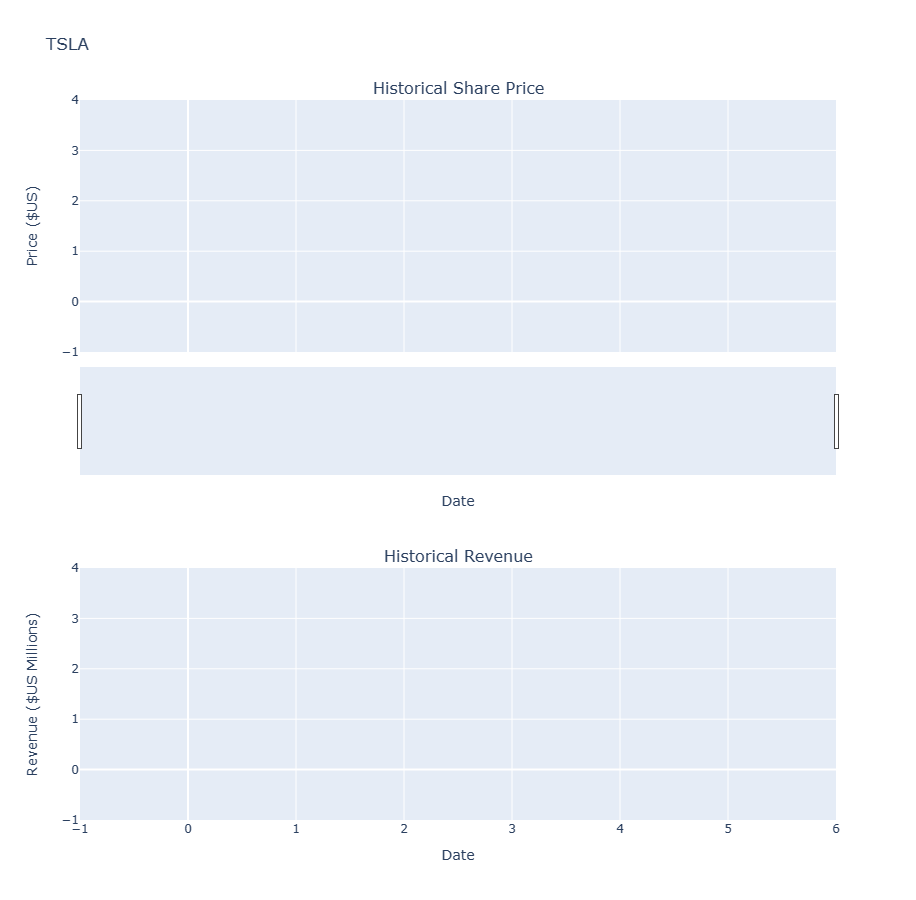

In [25]:
def make_graph(tesla_stock_data, tesla_revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    tesla_stock_data_specific = tesla_stock_data[tesla_stock_data.Date <= '2021-06-14']
    tesla_revenue_data_specific =tesla_revenue_data[tesla_revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(tesla_stock_data_specific.Date, format = 'mixed'),
        y=tesla_stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(tesla_revenue_data_specific.Date, format ='mixed'), 
                             y=tesla_revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(tesla_stock_data, tesla_revenue_data, 'TSLA')

In [31]:
gme_data = yf.Ticker("GME")
gme_data

yfinance.Ticker object <GME>

In [32]:
gme_data = gme_data.history(period="max")

Failed to get ticker 'GME' reason: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
GME: No timezone found, symbol may be delisted


In [33]:
gme_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [34]:
gme_data.reset_index(inplace=True)

In [35]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [36]:
gme_revenue_data = requests.get(url).text

In [37]:
soup = BeautifulSoup(gme_revenue_data,'html5lib')

In [38]:
gme_revenue_data = pd.DataFrame(columns=["Date", "Open", "Low", "Close", "Volume"])

In [39]:
read_html_pandas_data = pd.read_html(url)

In [40]:
read_html_pandas_data = pd.read_html(str(soup))

In [41]:
gem_revenue_dataframe = read_html_pandas_data[0]

gem_revenue_dataframe.tail()

,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


In [42]:
gme_data.reset_index(inplace=True)
gme_revenue_data.reset_index(inplace=True)

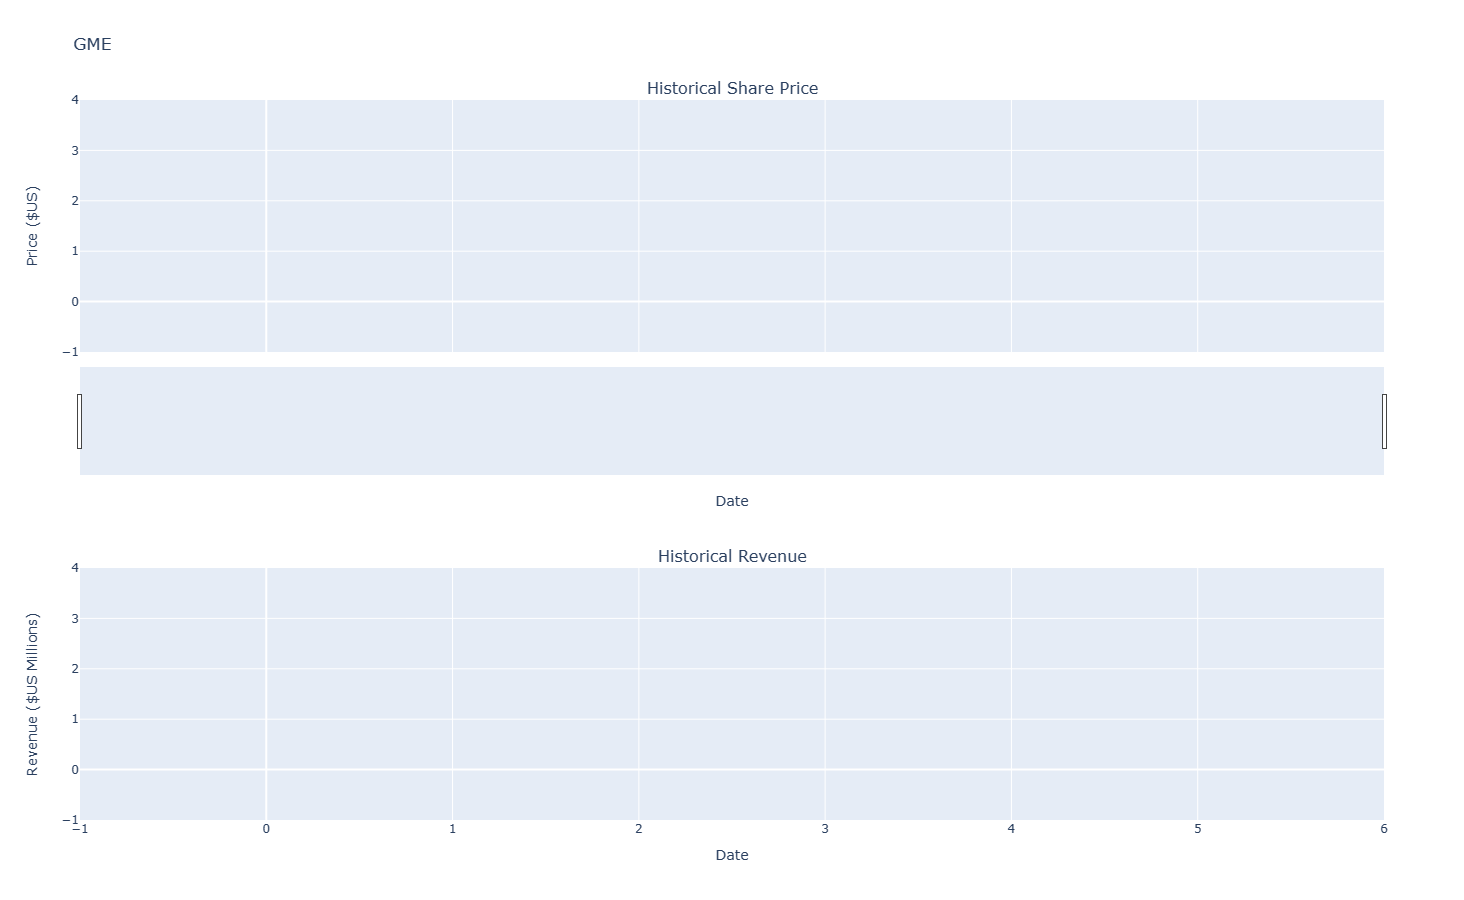

In [43]:
make_graph(gme_data, gme_revenue_data, 'GME')

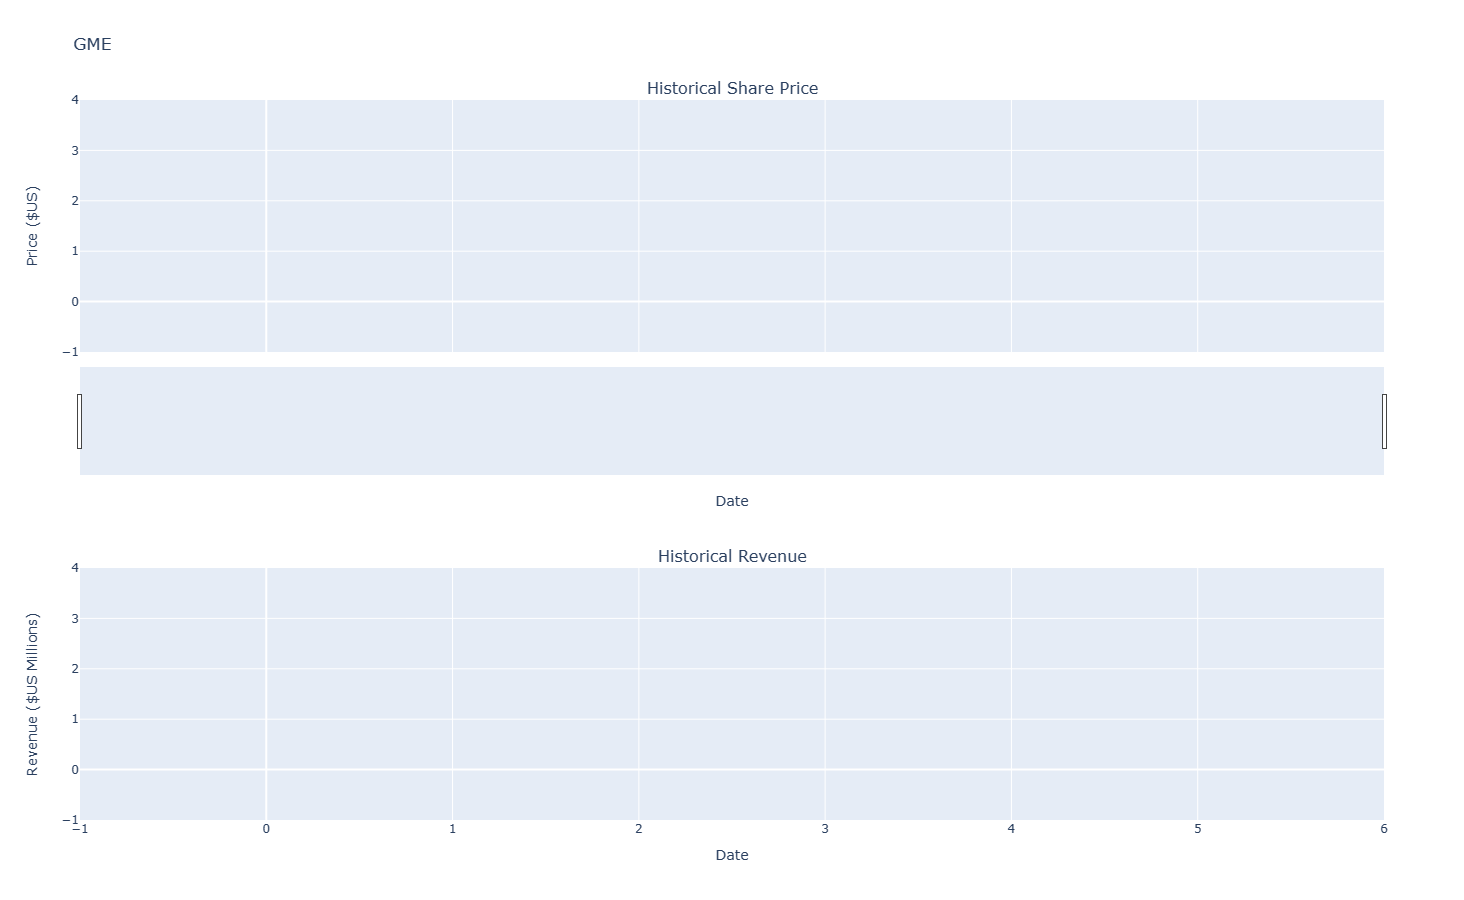

In [46]:
def make_graph(gme_data, gme_revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    gme_data_specific = gme_data[tesla_stock_data.Date <= '2008-06-14']
    gme_revenue_data_specific =tesla_revenue_data[tesla_revenue_data.Date <= '2008-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(gme_data_specific.Date, format = 'mixed'),
        y=gme_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(gme_revenue_data_specific.Date, format ='mixed'), 
                             y=gme_revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(gme_data, gme_revenue_data, 'GME')